## 1 задание

<ipython-input-34-d076197ed09a>:5: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


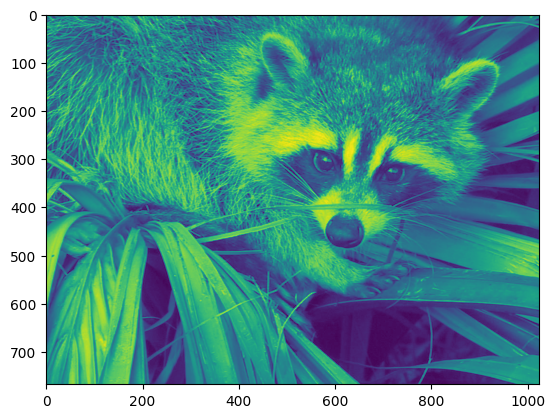

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

face = misc.face(gray=True)
plt.imshow(face)

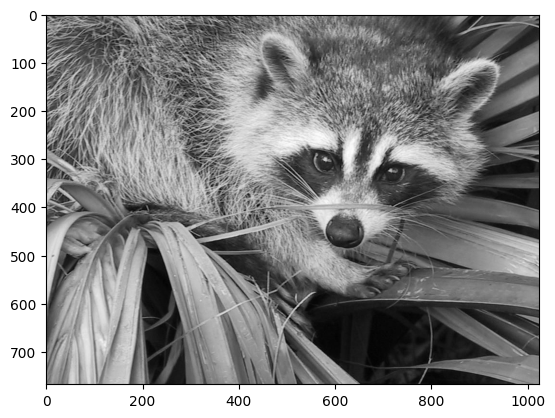

In [ ]:
plt.imshow(face, cmap=plt.cm.gray)

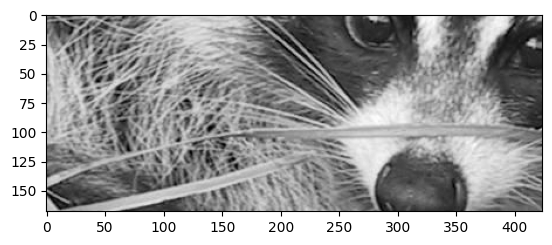

In [ ]:
crop_face = face[300:-300, 300:-300]
plt.imshow(crop_face, cmap=plt.cm.gray)

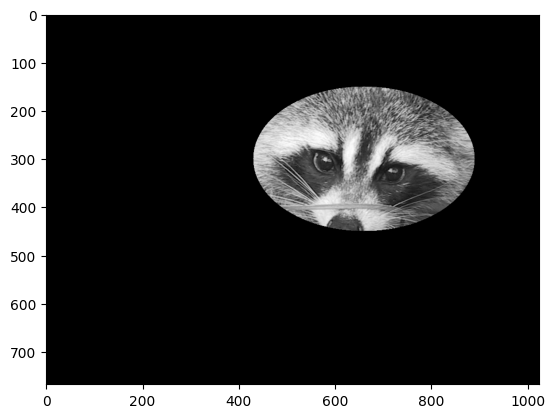

In [ ]:
sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx]


centerx, centery = (660, 300)
a = 300
b = 200
mask = (((x - centerx)**2 / a**2) + ((y - centery)**2 / b**2)) > 1
face[mask] = 0
plt.imshow(face, cmap=plt.cm.gray)

## 2 задание

Средняя популяция зайцев, рысей и моркови:
[34080.95238095 20166.66666667 42400.        ]
Стандартная девиация:
[20897.90645809 16254.59153691  3322.50622558]
Максимум зайцев был в 1903
Максимум рысей был в 1904
Максимум моркови был в 1900
Наибольшая популяция по годам:
1900: Морковь
1901: Морковь
1902: Заяц
1903: Заяц
1904: Рысь
1905: Рысь
1906: Морковь
1907: Морковь
1908: Морковь
1909: Морковь
1910: Морковь
1911: Морковь
1912: Заяц
1913: Заяц
1914: Заяц
1915: Рысь
1916: Морковь
1917: Морковь
1918: Морковь
1919: Морковь
1920: Морковь
Года, когда популяция больше 50000: [1902. 1903. 1904. 1912. 1913. 1914. 1915.]
Худшие года для зайцев: [1917. 1916.]
Худшие года для рысей: [1900. 1901.]
Худшие года для моркови: [1916. 1903.]
Корреляция между градиентом зайцев и рысями: -0.9179248480315341


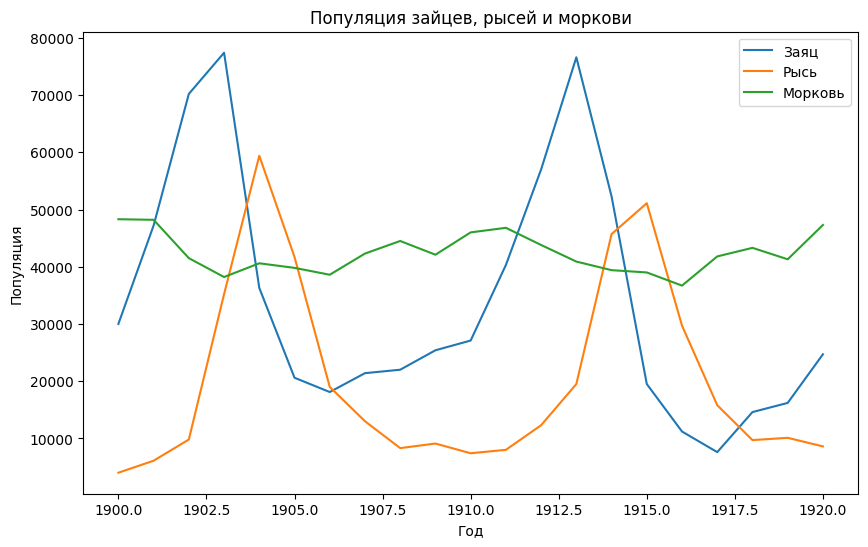

In [6]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt(r"https://scipy-lectures.org/_downloads/populations.txt")
years, hares, lynxes, carrots = data.T
populations = data[:, 1:]

print("Средняя популяция зайцев, рысей и моркови:")
print(np.mean(populations, axis=0))
print("Стандартная девиация:")
print(np.std(populations, axis=0))

max_year_hares = years[np.argmax(hares)]
max_year_lynxes = years[np.argmax(lynxes)]
max_year_carrots = years[np.argmax(carrots)]
print(f"Максимум зайцев был в {int(max_year_hares)}")
print(f"Максимум рысей был в {int(max_year_lynxes)}")
print(f"Максимум моркови был в {int(max_year_carrots)}")

species = np.array(['Заяц', 'Рысь', 'Морковь'])
dominant_species = species[np.argmax(populations, axis=1)]
print("Наибольшая популяция по годам:")
for year, species in zip(years, dominant_species):
    print(f"{int(year)}: {species}")

years_above_50000 = years[np.any(populations > 50000, axis=1)]
print("Года, когда популяция больше 50000:", years_above_50000)

worst_years_hares = years[np.argsort(hares)[:2]]
worst_years_lynxes = years[np.argsort(lynxes)[:2]]
worst_years_carrots = years[np.argsort(carrots)[:2]]
print("Худшие года для зайцев:", worst_years_hares)
print("Худшие года для рысей:", worst_years_lynxes)
print("Худшие года для моркови:", worst_years_carrots)

hare_gradient = np.gradient(hares)
correlation = np.corrcoef(hare_gradient, lynxes)[0, 1]
print("Корреляция между градиентом зайцев и рысями:", correlation)

plt.figure(figsize=(10, 6))
plt.plot(years, hares, label='Заяц')
plt.plot(years, lynxes, label='Рысь')
plt.plot(years, carrots, label='Морковь')
plt.legend(loc='upper right')
plt.xlabel('Год')
plt.ylabel('Популяция')
plt.title('Популяция зайцев, рысей и моркови')

## 3 задание

<ipython-input-19-4f5c2e28828d>:10: RuntimeWarning: overflow encountered in square
  z = z**2 + c
<ipython-input-19-4f5c2e28828d>:10: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


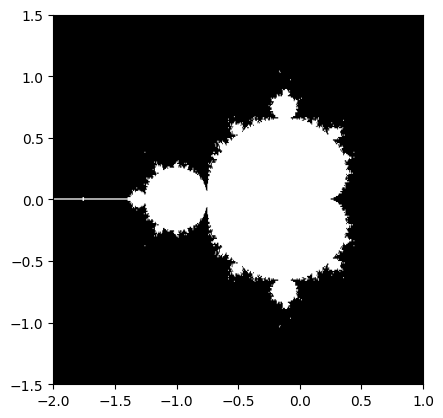

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def compute_mandelbrot(N_max, threshold, nx, ny):
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)
    c = x[:, np.newaxis] + 1j * y[np.newaxis, :]
    z = c
    for i in range(N_max):
        z = z**2 + c
    mandelbrot_set = (abs(z) < threshold)

    return mandelbrot_set

mandelbrot_set = compute_mandelbrot(50,50,501,301)

plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
